In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
285106,2023-04-15,ZW,Zimbabwe,AFRO,10,264607,0,5684
285107,2023-04-16,ZW,Zimbabwe,AFRO,3,264610,0,5684
285108,2023-04-17,ZW,Zimbabwe,AFRO,3,264613,0,5684
285109,2023-04-18,ZW,Zimbabwe,AFRO,0,264613,0,5684


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285111 entries, 0 to 285110
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      285111 non-null  object
 1   Country_code       283908 non-null  object
 2   Country            285111 non-null  object
 3   WHO_region         285111 non-null  object
 4   New_cases          285111 non-null  int64 
 5   Cumulative_cases   285111 non-null  int64 
 6   New_deaths         285111 non-null  int64 
 7   Cumulative_deaths  285111 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 17.4+ MB


In [17]:
df['Country_code'].unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [18]:
df.shape

(285111, 8)

We will not target or exploit 'other' countries, as their status and intentions are not clearly defined.

In [19]:
condition = df['Country_code'] == ' '  
rows_to_drop = df[condition].index

df.drop(rows_to_drop, inplace=True)

In [20]:
df.shape

(283908, 8)

In [21]:
df['Country_code'].unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [22]:
# Convert 'Date' column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Group by 'Date' and sum the 'New Cases'
cases_by_date = df.groupby('Date_reported')['New_cases'].sum().to_dict()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


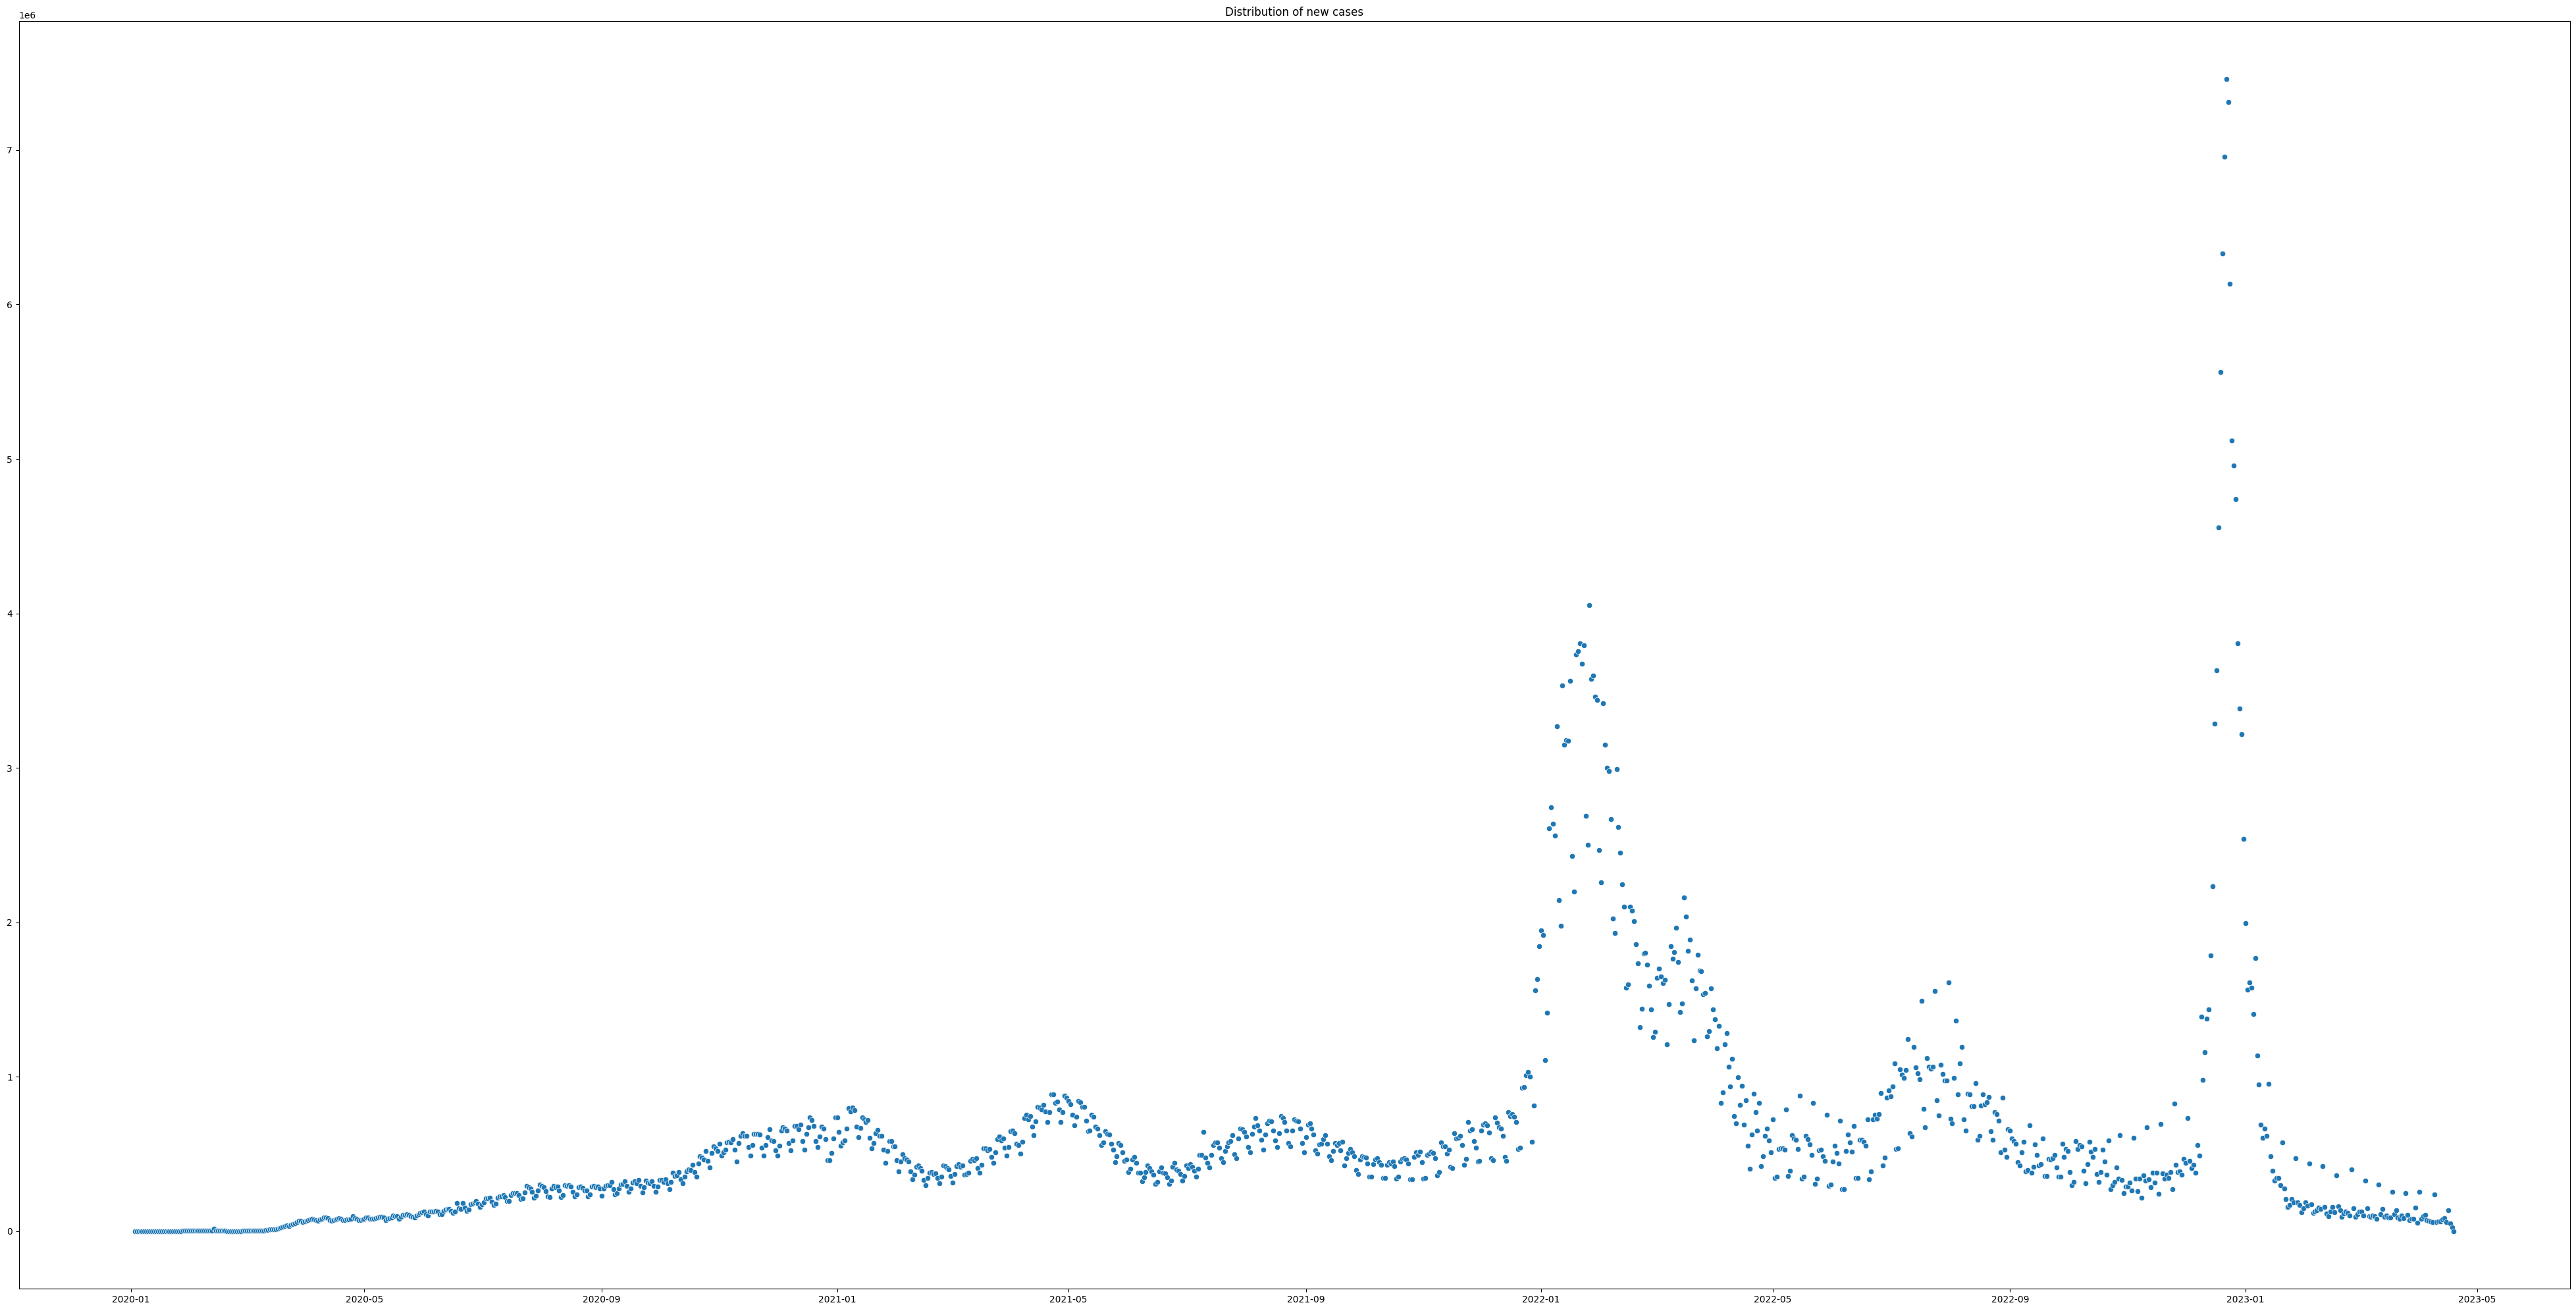

In [23]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(50, 25))

sns.scatterplot(x = cases_by_date.keys(), y = cases_by_date.values())

ax.set_title(f"Distribution of new cases")
plt.show()

In [24]:
# Group the data by 'Country' and sum the 'NewCases' column for each group
count_cases_in_countries = df.groupby('Country_code')['New_cases'].sum()

count_cases_in_countries

Country_code
AD      47945
AE    1060146
AF     213191
AG       9106
AI       3904
       ...   
YE      11945
YT      42027
ZA    4072533
ZM     343803
ZW     264613
Name: New_cases, Length: 235, dtype: int64

/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/1244757880.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


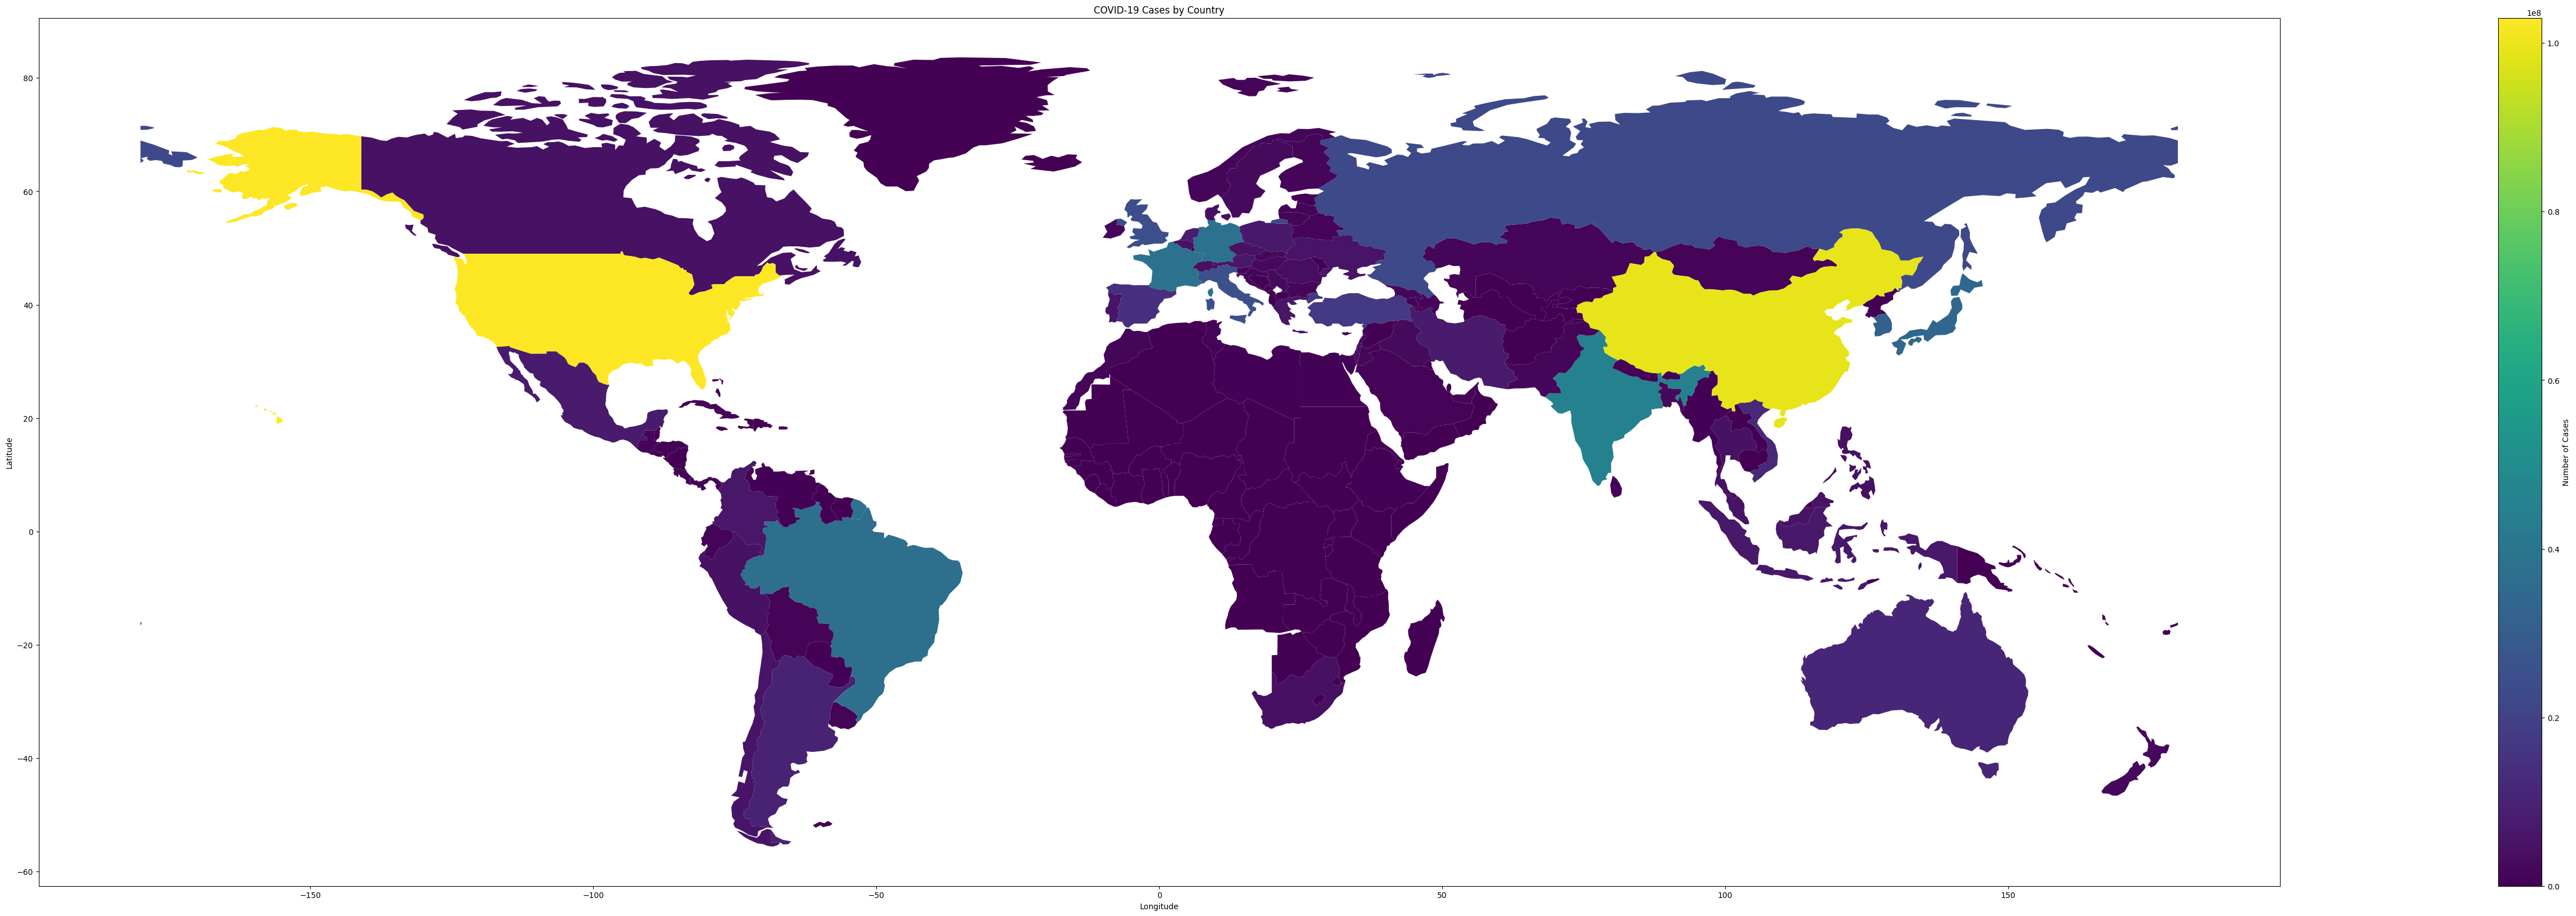

In [25]:
import geopandas as gpd
import pycountry

# Create a dictionary mapping ISO country codes to two-letter codes
iso_to_alpha2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

# Load world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the iso_a3 column to two-letter codes
world_map['iso_a2'] = world_map['iso_a3'].map(iso_to_alpha2)

# Merge country names and numbers with world map data
world_map['New_cases'] = world_map['iso_a2'].map(count_cases_in_countries)

world_map

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(100, 20))

# Plot the map with cartogram
world_map.plot(column='New_cases', ax=ax, legend=True, legend_kwds={'label': 'Number of Cases'})

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('COVID-19 Cases by Country')

# Display the map
plt.show()

In [26]:
countries_population = pd.read_csv('List_of_countries_and_dependencies_by_population_1.csv')

countries_population.head()

,Unnamed: 0,Country / Dependency,Population,% of\nworld,Date,Source (official or from\nthe United Nations),Unnamed: 6
0,–,World,"8,053,662,000",100%,13 Aug 2023,UN projection,NaN
1,1,China,"1,411,750,000",17.5%,31 Dec 2022,Official estimate,NaN
2,2,India,"1,392,329,000",17.3%,1 Jul 2023,Official projection,NaN
3,3,United States,"335,236,000",4.2%,13 Aug 2023,National population clock,NaN
4,4,Indonesia,"277,749,853",3.4%,31 Dec 2022,Official estimate,NaN


In [27]:
countries_population.drop('Unnamed: 0', axis=1, inplace=True)
countries_population.drop('Unnamed: 6', axis=1, inplace=True)
countries_population.drop('Date', axis=1, inplace=True)
countries_population.drop('Source (official or from\nthe United Nations)', axis=1, inplace=True)

In [28]:
countries_population

,Country / Dependency,Population,% of\nworld
0,World,"8,053,662,000",100%
1,China,"1,411,750,000",17.5%
2,India,"1,392,329,000",17.3%
3,United States,"335,236,000",4.2%
4,Indonesia,"277,749,853",3.4%
...,...,...,...
237,Tokelau (NZ),"1,647",0%
238,Niue,"1,549",0%
239,Cocos (Keeling) Islands (Australia),593,0%
240,Vatican City,246,0%


In [29]:
countries_list = df["Country"].unique()
print(countries_list)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Fren

In [30]:
cases_count = {}

for country in countries_list:
    cases_count[country] = 0

for country in countries_list:
    value_counts = df[df['Country'] == country]['New_cases']
    total_new_cases = value_counts.sum()
    cases_count[country] = total_new_cases

old_countries = cases_count.keys()
set(old_countries)

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',

In [31]:
cases_count

{'Afghanistan': 213191,
 'Albania': 333897,
 'Algeria': 271644,
 'American Samoa': 8329,
 'Andorra': 47945,
 'Angola': 105353,
 'Anguilla': 3904,
 'Antigua and Barbuda': 9106,
 'Argentina': 10044957,
 'Armenia': 448980,
 'Aruba': 44114,
 'Australia': 11178368,
 'Austria': 6054092,
 'Azerbaijan': 830856,
 'Bahamas': 38003,
 'Bahrain': 696614,
 'Bangladesh': 2038129,
 'Barbados': 107332,
 'Belarus': 994037,
 'Belgium': 4786803,
 'Belize': 70782,
 'Benin': 28014,
 'Bermuda': 18860,
 'Bhutan': 62654,
 'Bolivia (Plurinational State of)': 1196416,
 'Bonaire': 9855,
 'Bosnia and Herzegovina': 402709,
 'Botswana': 329841,
 'Brazil': 37358092,
 'British Virgin Islands': 7305,
 'Brunei Darussalam': 285740,
 'Bulgaria': 1302267,
 'Burkina Faso': 22056,
 'Burundi': 53726,
 'Cabo Verde': 63308,
 'Cambodia': 138726,
 'Cameroon': 124895,
 'Canada': 4647673,
 'Cayman Islands': 31472,
 'Central African Republic': 15367,
 'Chad': 7696,
 'Chile': 5278252,
 'China': 99240488,
 'Colombia': 6363544,
 'Comor

In [32]:
new_countries = set(countries_population['Country / Dependency'].unique())
new_countries

{'Abkhazia',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa (US)',
 'Andorra',
 'Angola',
 'Anguilla (UK)',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Artsakh',
 'Aruba (Netherlands)',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda (UK)',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands (UK)',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands (UK)',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island (Australia)',
 'Cocos (Keeling) Islands (Australia)',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao (Netherlands)',
 'Cyprus',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq

In [33]:
key_changes = {'American Samoa' : 'American Samoa (US)',
              'Bermuda': 'Bermuda (UK)',
              'Bolivia (Plurinational State of)': 'Bolivia',
              'British Virgin Islands': 'British Virgin Islands (UK)',
              'Brunei Darussalam': 'Brunei',
              'Cabo Verde': 'Cape Verde',
              'Cayman Islands': 'Cayman Islands (UK)',
              'Czechia': 'Czech Republic',
              'Democratic Republic of the Congo': 'DR Congo',
              'Greenland': 'Greenland (Denmark)',
              'Iran (Islamic Republic of)' : 'Iran',
              "Democratic People's Republic of Korea": 'North Korea',
              'occupied Palestinian territory, including east Jerusalem': 'Palestine', 
              'Russian Federation': 'Russia',
              'Republic of Korea': 'South Korea',
              'Republic of Moldova': ' Moldova',
              'Syrian Arab Republic': 'Syria',
              'Türkiye': 'Turkey',
              'Turkmenistan': 'Turkmenistan',
              'The United Kingdom': 'United Kingdom',
              'United States of America': 'United States', 
              'Viet Nam': 'Vietnam'}

In [34]:
def replace_country_names(original_dict, key_mapping):
    new_dict = {}
    for country, value in original_dict.items():
        new_country = key_mapping.get(country, country) 
        new_dict[new_country] = value
    return new_dict

# Replace keys using the function
new_dict = replace_country_names(cases_count, key_changes)

new_dict

{'Afghanistan': 213191,
 'Albania': 333897,
 'Algeria': 271644,
 'American Samoa (US)': 8329,
 'Andorra': 47945,
 'Angola': 105353,
 'Anguilla': 3904,
 'Antigua and Barbuda': 9106,
 'Argentina': 10044957,
 'Armenia': 448980,
 'Aruba': 44114,
 'Australia': 11178368,
 'Austria': 6054092,
 'Azerbaijan': 830856,
 'Bahamas': 38003,
 'Bahrain': 696614,
 'Bangladesh': 2038129,
 'Barbados': 107332,
 'Belarus': 994037,
 'Belgium': 4786803,
 'Belize': 70782,
 'Benin': 28014,
 'Bermuda (UK)': 18860,
 'Bhutan': 62654,
 'Bolivia': 1196416,
 'Bonaire': 9855,
 'Bosnia and Herzegovina': 402709,
 'Botswana': 329841,
 'Brazil': 37358092,
 'British Virgin Islands (UK)': 7305,
 'Brunei': 285740,
 'Bulgaria': 1302267,
 'Burkina Faso': 22056,
 'Burundi': 53726,
 'Cape Verde': 63308,
 'Cambodia': 138726,
 'Cameroon': 124895,
 'Canada': 4647673,
 'Cayman Islands (UK)': 31472,
 'Central African Republic': 15367,
 'Chad': 7696,
 'Chile': 5278252,
 'China': 99240488,
 'Colombia': 6363544,
 'Comoros': 9105,
 'Con

In [35]:
countries_population['disease_cases'] = countries_population['Country / Dependency'].map(new_dict).fillna(0)

In [36]:
countries_population

,Country / Dependency,Population,% of\nworld,disease_cases
0,World,"8,053,662,000",100%,0.0
1,China,"1,411,750,000",17.5%,99240488.0
2,India,"1,392,329,000",17.3%,44834859.0
3,United States,"335,236,000",4.2%,102977396.0
4,Indonesia,"277,749,853",3.4%,6759513.0
...,...,...,...,...
237,Tokelau (NZ),"1,647",0%,0.0
238,Niue,"1,549",0%,747.0
239,Cocos (Keeling) Islands (Australia),593,0%,0.0
240,Vatican City,246,0%,0.0


In [37]:
countries_population[countries_population['disease_cases'] ==0]['Country / Dependency']

0                                                  World
23                                              Tanzania
49                                           Ivory Coast
51                                             Venezuela
54                                           North Korea
57                                                Taiwan
104                                                 Laos
105                                    Hong Kong (China)
111                                         Turkmenistan
136                                     Puerto Rico (US)
143                                              Moldova
151                                               Kosovo
157                                           East Timor
167                                        Macau (China)
171                                       Western Sahara
179                                      Northern Cyprus
180                                         Transnistria
182                            

There arent important (big) countries, we can delete them

In [38]:
countries_population.loc[0, 'disease_cases'] = countries_population['disease_cases'].sum()

In [39]:
countries_population = countries_population[countries_population['disease_cases'] != 0]
countries_population

,Country / Dependency,Population,% of\nworld,disease_cases
0,World,"8,053,662,000",100%,759113570.0
1,China,"1,411,750,000",17.5%,99240488.0
2,India,"1,392,329,000",17.3%,44834859.0
3,United States,"335,236,000",4.2%,102977396.0
4,Indonesia,"277,749,853",3.4%,6759513.0
...,...,...,...,...
224,Palau,"16,733",0.0002%,5999.0
226,Cook Islands,"15,040",0.0002%,7055.0
227,Nauru,"11,832",0.0001%,5393.0
229,Tuvalu,"10,679",0.0001%,2779.0


In [40]:
countries_population.reset_index(drop=True, inplace=True)
countries_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country / Dependency  192 non-null    object 
 1   Population            192 non-null    object 
 2   % of
world            192 non-null    object 
 3   disease_cases         192 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [41]:
def convert_to_int(formatted_string):
    return int(formatted_string.replace(',', ''))

countries_population['Population'] = countries_population['Population'].apply(convert_to_int)

/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/324785582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_population['Population'] = countries_population['Population'].apply(convert_to_int)


In [42]:
countries_population

,Country / Dependency,Population,% of\nworld,disease_cases
0,World,8053662000,100%,759113570.0
1,China,1411750000,17.5%,99240488.0
2,India,1392329000,17.3%,44834859.0
3,United States,335236000,4.2%,102977396.0
4,Indonesia,277749853,3.4%,6759513.0
...,...,...,...,...
187,Palau,16733,0.0002%,5999.0
188,Cook Islands,15040,0.0002%,7055.0
189,Nauru,11832,0.0001%,5393.0
190,Tuvalu,10679,0.0001%,2779.0


In [43]:
countries_population['Percentage_sick_in_country'] = round((countries_population['disease_cases'] / countries_population['Population']) * 100, 2)

countries_population['Percentage_sick_in_country'] = countries_population['Percentage_sick_in_country'].astype(str) + '%'

countries_population['Percentage_sick_in_world'] = round((countries_population['disease_cases'] / countries_population.loc[0, 'disease_cases']) * 100, 2)

countries_population['Percentage_sick_in_world'] = countries_population['Percentage_sick_in_world'].astype(str) + '%'

countries_population

/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/249875973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_population['Percentage_sick_in_country'] = round((countries_population['disease_cases'] / countries_population['Population']) * 100, 2)
/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/249875973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_population['Percentage_sick_in_country'] = countries_population['Percentage_sick_in_country'].astype(s

,Country / Dependency,Population,% of\nworld,disease_cases,Percentage_sick_in_country,Percentage_sick_in_world
0,World,8053662000,100%,759113570.0,9.43%,100.0%
1,China,1411750000,17.5%,99240488.0,7.03%,13.07%
2,India,1392329000,17.3%,44834859.0,3.22%,5.91%
3,United States,335236000,4.2%,102977396.0,30.72%,13.57%
4,Indonesia,277749853,3.4%,6759513.0,2.43%,0.89%
...,...,...,...,...,...,...
187,Palau,16733,0.0002%,5999.0,35.85%,0.0%
188,Cook Islands,15040,0.0002%,7055.0,46.91%,0.0%
189,Nauru,11832,0.0001%,5393.0,45.58%,0.0%
190,Tuvalu,10679,0.0001%,2779.0,26.02%,0.0%


In [44]:
country_codes = {
    'World': '',
    'China': 'CN',
    'India': 'IN',
    'United States': 'US',
    'Indonesia': 'ID',
    'Pakistan': 'PK',
    'Nigeria': 'NG',
    'Brazil': 'BR',
    'Bangladesh': 'BD',
    'Russia': 'RU',
    'Mexico': 'MX',
    'Japan': 'JP',
    'Philippines': 'PH',
    'Ethiopia': 'ET',
    'Egypt': 'EG',
    'Vietnam': 'VN',
    'DR Congo': 'CD',
    'Turkey': 'TR',
    'Iran': 'IR',
    'Germany': 'DE',
    'Thailand': 'TH',
    'France': 'FR',
    'United Kingdom': 'GB',
    'South Africa': 'ZA',
    'Italy': 'IT',
    'Myanmar': 'MM',
    'Colombia': 'CO',
    'Kenya': 'KE',
    'South Korea': 'KR',
    'Spain': 'ES',
    'Argentina': 'AR',
    'Algeria': 'DZ',
    'Iraq': 'IQ',
    'Uganda': 'UG',
    'Sudan': 'SD',
    'Ukraine': 'UA',
    'Canada': 'CA',
    'Poland': 'PL',
    'Morocco': 'MA',
    'Uzbekistan': 'UZ',
    'Afghanistan': 'AF',
    'Peru': 'PE',
    'Angola': 'AO',
    'Malaysia': 'MY',
    'Mozambique': 'MZ',
    'Saudi Arabia': 'SA',
    'Yemen': 'YE',
    'Ghana': 'GH',
    'Nepal': 'NP',
    'Madagascar': 'MG',
    'Australia': 'AU',
    'Cameroon': 'CM',
    'Niger': 'NE',
    'Mali': 'ML',
    'Syria': 'SY',
    'Burkina Faso': 'BF',
    'Sri Lanka': 'LK',
    'Malawi': 'MW',
    'Chile': 'CL',
    'Kazakhstan': 'KZ',
    'Zambia': 'ZM',
    'Romania': 'RO',
    'Ecuador': 'EC',
    'Somalia': 'SO',
    'Netherlands': 'NL',
    'Senegal': 'SN',
    'Guatemala': 'GT',
    'Chad': 'TD',
    'Cambodia': 'KH',
    'Zimbabwe': 'ZW',
    'Guinea': 'GN',
    'South Sudan': 'SS',
    'Rwanda': 'RW',
    'Burundi': 'BI',
    'Benin': 'BJ',
    'Bolivia': 'BO',
    'Tunisia': 'TN',
    'Papua New Guinea': 'PG',
    'Belgium': 'BE',
    'Haiti': 'HT',
    'Jordan': 'JO',
    'Cuba': 'CU',
    'Czech Republic': 'CZ',
    'Sweden': 'SE',
    'Dominican Republic': 'DO',
    'Greece': 'GR',
    'Portugal': 'PT',
    'Azerbaijan': 'AZ',
    'Tajikistan': 'TJ',
    'Israel': 'IL',
    'Honduras': 'HN',
    'Hungary': 'HU',
    'United Arab Emirates': 'AE',
    'Belarus': 'BY',
    'Austria': 'AT',
    'Switzerland': 'CH',
    'Sierra Leone': 'SL',
    'Togo': 'TG',
    'Paraguay': 'PY',
    'Kyrgyzstan': 'KG',
    'Libya': 'LY',
    'El Salvador': 'SV',
    'Serbia': 'RS',
    'Nicaragua': 'NI',
    'Bulgaria': 'BG',
    'Congo': 'CG',
    'Denmark': 'DK',
    'Central African Republic': 'CF',
    'Finland': 'FI',
    'Norway': 'NO',
    'Lebanon': 'LB',
    'Palestine': 'PS',
    'Singapore': 'SG',
    'Slovakia': 'SK',
    'Costa Rica': 'CR',
    'New Zealand': 'NZ',
    'Ireland': 'IE',
    'Oman': 'OM',
    'Kuwait': 'KW',
    'Liberia': 'LR',
    'Mauritania': 'MR',
    'Panama': 'PA',
    'Croatia': 'HR',
    'Eritrea': 'ER',
    'Georgia': 'GE',
    'Uruguay': 'UY',
    'Mongolia': 'MN',
    'Bosnia and Herzegovina': 'BA',
    'Qatar': 'QA',
    'Armenia': 'AM',
    'Lithuania': 'LT',
    'Jamaica': 'JM',
    'Albania': 'AL',
    'Namibia': 'NA',
    'Gambia': 'GM',
    'Botswana': 'BW',
    'Lesotho': 'LS',
    'Gabon': 'GA',
    'Slovenia': 'SI',
    'Latvia': 'LV',
    'North Macedonia': 'MK',
    'Guinea-Bissau': 'GW',
    'Equatorial Guinea': 'GQ',
    'Bahrain': 'BH',
    'Estonia': 'EE',
    'Trinidad and Tobago': 'TT',
    'Mauritius': 'MU',
    'Eswatini': 'SZ',
    'Djibouti': 'DJ',
    'Cyprus': 'CY',
    'Fiji': 'FJ',
    'Bhutan': 'BT',
    'Comoros': 'KM',
    'Guyana': 'GY',
    'Solomon Islands': 'SB',
    'Luxembourg': 'LU',
    'Montenegro': 'ME',
    'Suriname': 'SR',
    'Cape Verde': 'CV',
    'Malta': 'MT',
    'Belize': 'BZ',
    'Brunei': 'BN',
    'Maldives': 'MV',
    'Bahamas': 'BS',
    'Iceland': 'IS',
    'Vanuatu': 'VU',
    'Barbados': 'BB',
    'Samoa': 'WS',
    'Saint Lucia': 'LC',
    'Kiribati': 'KI',
    'Grenada': 'GD',
    'Saint Vincent and the Grenadines': 'VC',
    'Antigua and Barbuda': 'AG',
    'Seychelles': 'SC',
    'Tonga': 'TO',
    'Andorra': 'AD',
    'Cayman Islands (UK)': 'KY',
    'Dominica': 'DM',
    'Bermuda (UK)': 'BM',
    'Greenland (Denmark)': 'GL',
    'American Samoa (US)': 'AS',
    'Saint Kitts and Nevis': 'KN',
    'Liechtenstein': 'LI',
    'Marshall Islands': 'MH',
    'Monaco': 'MC',
    'San Marino': 'SM',
    'British Virgin Islands (UK)': 'VG',
    'Palau': 'PW',
    'Cook Islands': 'CK',
    'Nauru': 'NR',
    'Tuvalu': 'TV',
    'Niue': 'NU'
}

countries_population['iso_a2'] = country_codes.values()

countries_population

/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/328717745.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_population['iso_a2'] = country_codes.values()


,Country / Dependency,Population,% of\nworld,disease_cases,Percentage_sick_in_country,Percentage_sick_in_world,iso_a2
0,World,8053662000,100%,759113570.0,9.43%,100.0%,
1,China,1411750000,17.5%,99240488.0,7.03%,13.07%,CN
2,India,1392329000,17.3%,44834859.0,3.22%,5.91%,IN
3,United States,335236000,4.2%,102977396.0,30.72%,13.57%,US
4,Indonesia,277749853,3.4%,6759513.0,2.43%,0.89%,ID
...,...,...,...,...,...,...,...
187,Palau,16733,0.0002%,5999.0,35.85%,0.0%,PW
188,Cook Islands,15040,0.0002%,7055.0,46.91%,0.0%,CK
189,Nauru,11832,0.0001%,5393.0,45.58%,0.0%,NR
190,Tuvalu,10679,0.0001%,2779.0,26.02%,0.0%,TV


In [45]:
countries_population.columns

Index(['Country / Dependency', 'Population', '% of\nworld', 'disease_cases',
       'Percentage_sick_in_country', 'Percentage_sick_in_world', 'iso_a2'],
      dtype='object')

In [46]:
precentage_sick = countries_population[['Percentage_sick_in_world', 'iso_a2']]

In [47]:
countries_population

,Country / Dependency,Population,% of\nworld,disease_cases,Percentage_sick_in_country,Percentage_sick_in_world,iso_a2
0,World,8053662000,100%,759113570.0,9.43%,100.0%,
1,China,1411750000,17.5%,99240488.0,7.03%,13.07%,CN
2,India,1392329000,17.3%,44834859.0,3.22%,5.91%,IN
3,United States,335236000,4.2%,102977396.0,30.72%,13.57%,US
4,Indonesia,277749853,3.4%,6759513.0,2.43%,0.89%,ID
...,...,...,...,...,...,...,...
187,Palau,16733,0.0002%,5999.0,35.85%,0.0%,PW
188,Cook Islands,15040,0.0002%,7055.0,46.91%,0.0%,CK
189,Nauru,11832,0.0001%,5393.0,45.58%,0.0%,NR
190,Tuvalu,10679,0.0001%,2779.0,26.02%,0.0%,TV


In [48]:
percentage = (countries_population['disease_cases'] / countries_population.loc[0, 'Population']) * 100
percentage = percentage.round(2)

df_for_map = pd.DataFrame({
    'iso_a2': countries_population['iso_a2'],
    'percentage': percentage
})

df_for_map.drop(df_for_map.index[0], inplace=True)
df_for_map.reset_index(drop=True)

df_for_map_series = df_for_map.groupby('iso_a2')['percentage'].mean()

print(df_for_map_series)

iso_a2
AD    0.00
AE    0.01
AF    0.00
AG    0.00
AL    0.00
      ... 
WS    0.00
YE    0.00
ZA    0.05
ZM    0.00
ZW    0.00
Name: percentage, Length: 191, dtype: float64


/var/folders/_q/vmdnnm7j4q53sm928pzf2bcm0000gn/T/ipykernel_81746/201323193.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


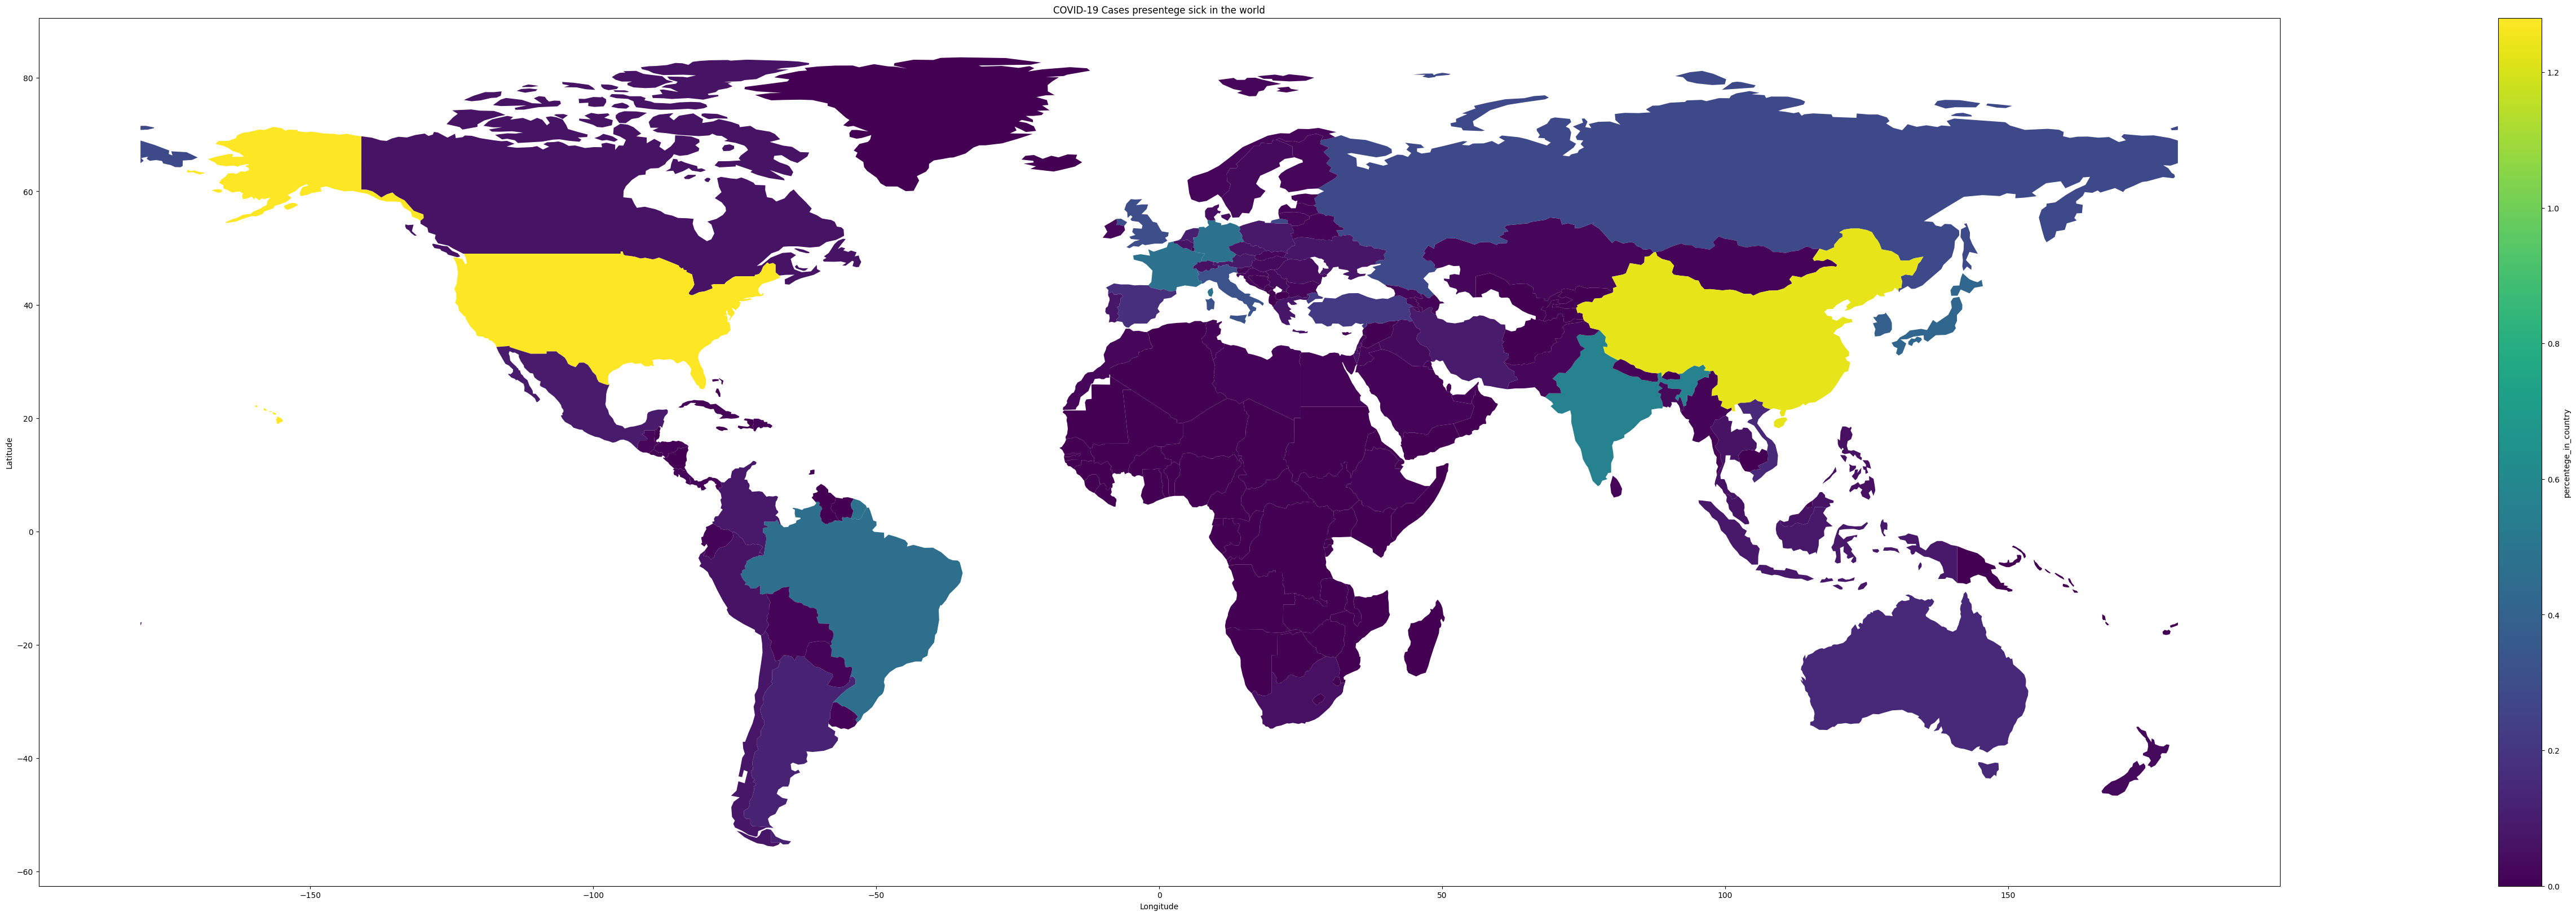

In [49]:
# Create a dictionary mapping ISO country codes to two-letter codes
iso_to_alpha2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

# Load world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the iso_a3 column to two-letter codes
world_map['iso_a2'] = world_map['iso_a3'].map(iso_to_alpha2)

# Merge country names and numbers with world map data
world_map['percentege_in_country'] = world_map['iso_a2'].map(df_for_map_series)

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(100, 20))

# Plot the map with cartogram
world_map.plot(column='percentege_in_country', ax=ax, legend=True, legend_kwds={'label': 'percentege_in_country'})

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('COVID-19 Cases presentege sick in the world')

# Display the map
plt.show()